In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('test_new.csv')

In [4]:
dataset.head(100)

,Red,Green,Blue,X,Y,Z,Classification,Intensity
0,81,84,94,716000.508,935999.281,10.609,3,0.0
1,67,65,87,716000.082,935999.061,11.248,3,0.0
2,62,61,81,716000.252,935998.521,4.348,3,0.0
3,67,65,87,716000.139,935998.958,9.781,3,0.0
4,57,60,81,716000.552,935997.671,6.868,3,0.0
...,...,...,...,...,...,...,...,...
95,129,126,103,716001.252,935995.562,11.192,3,0.0
96,92,90,89,716001.559,935995.748,10.971,3,0.0
97,123,122,109,716001.299,935995.468,9.811,3,0.0
98,137,123,121,716004.259,935997.539,10.559,3,0.0


In [5]:
x = np.array(dataset['X'])
y = np.array(dataset['Y'])
z = np.array(dataset['Z'])
r = np.array(dataset['Red'])
g = np.array(dataset['Green'])
b = np.array(dataset['Blue'])

In [6]:
x.shape

(4372631,)

In [7]:
y.shape

(4372631,)

In [8]:
z.shape

(4372631,)

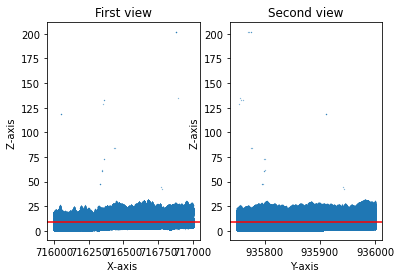

In [9]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(x, z, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.title("First view")
plt.xlabel('X-axis ')
plt.ylabel('Z-axis ')

plt.subplot(1, 2, 2) # index 2
plt.scatter(y, z, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.title("Second view")
plt.xlabel('Y-axis ')
plt.ylabel('Z-axis ')

plt.show()

In [10]:
pcd=np.column_stack((x,y,z))
mask=z>np.mean(z)
spatial_query=pcd[z>np.mean(z)]

In [11]:
pcd.shape

(4372631, 3)

In [12]:
x[mask]

array([716000.508, 716000.082, 716000.139, ..., 716775.448, 716881.13 ,
       716328.97 ])

In [13]:
x

array([716000.508, 716000.082, 716000.252, ..., 716859.13 , 716695.34 ,
       716816.47 ])

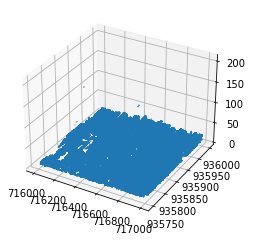

In [14]:
#plotting the results 3D
ax = plt.axes(projection='3d')
ax.scatter(x[mask], y[mask], z[mask], s=0.1)
plt.show()

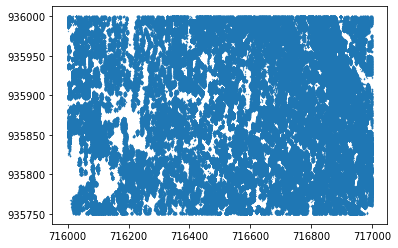

In [15]:
#plotting the results 2D
plt.scatter(x[mask], y[mask], s=0.1)
plt.show()

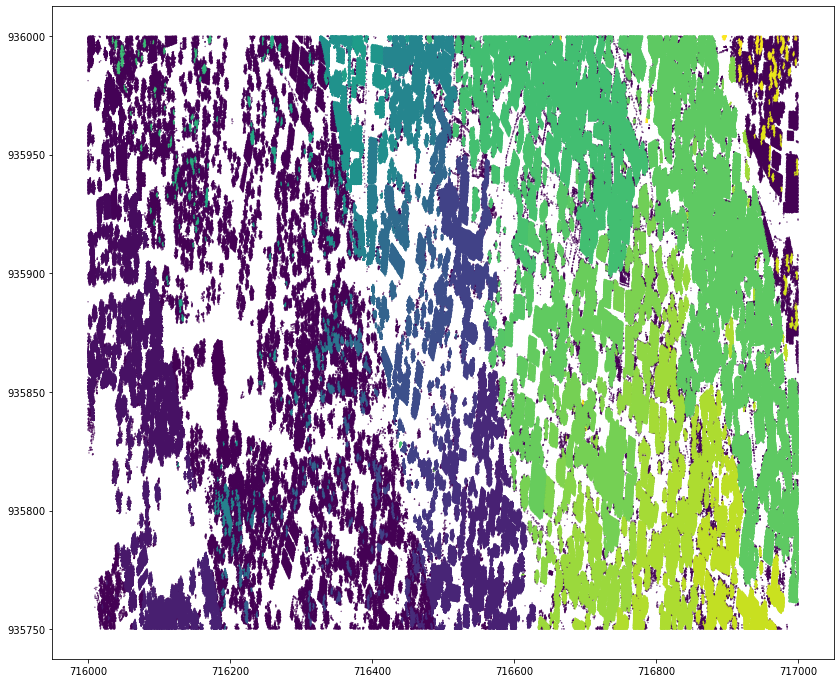

In [16]:
X=np.column_stack((x[mask], y[mask]))
kmeans = DBSCAN(eps=1,min_samples=30).fit(X)
plt.figure(figsize=(14,12))
plt.scatter(x[mask], y[mask], c=kmeans.labels_, s=0.1)
plt.show()

In [17]:
np.column_stack((x[mask], y[mask], z[mask],kmeans.labels_)).round(3)

array([[ 7.16000508e+05,  9.35999281e+05,  1.06090000e+01,
         0.00000000e+00],
       [ 7.16000082e+05,  9.35999061e+05,  1.12480000e+01,
         0.00000000e+00],
       [ 7.16000139e+05,  9.35998958e+05,  9.78100000e+00,
         0.00000000e+00],
       ...,
       [ 7.16775448e+05,  9.35942952e+05,  4.28210000e+01,
         6.69000000e+02],
       [ 7.16881130e+05,  9.35775650e+05,  2.01570000e+02,
         8.65000000e+02],
       [ 7.16328970e+05,  9.35794920e+05,  4.78300000e+01,
        -1.00000000e+00]])

In [18]:
np.column_stack((x[mask], y[mask], z[mask],kmeans.labels_)).shape

(1935643, 4)

In [19]:
xyz=np.column_stack((x,y,z))
rgb=np.column_stack((r,g,b))


In [20]:
xyz

array([[7.16000508e+05, 9.35999281e+05, 1.06090000e+01],
       [7.16000082e+05, 9.35999061e+05, 1.12480000e+01],
       [7.16000252e+05, 9.35998521e+05, 4.34800000e+00],
       ...,
       [7.16859130e+05, 9.35989450e+05, 2.91000000e+00],
       [7.16695340e+05, 9.35956810e+05, 2.57000000e+00],
       [7.16816470e+05, 9.35943530e+05, 2.17000000e+00]])

In [21]:
xyz.shape

(4372631, 3)

In [22]:
rgb.shape

(4372631, 3)

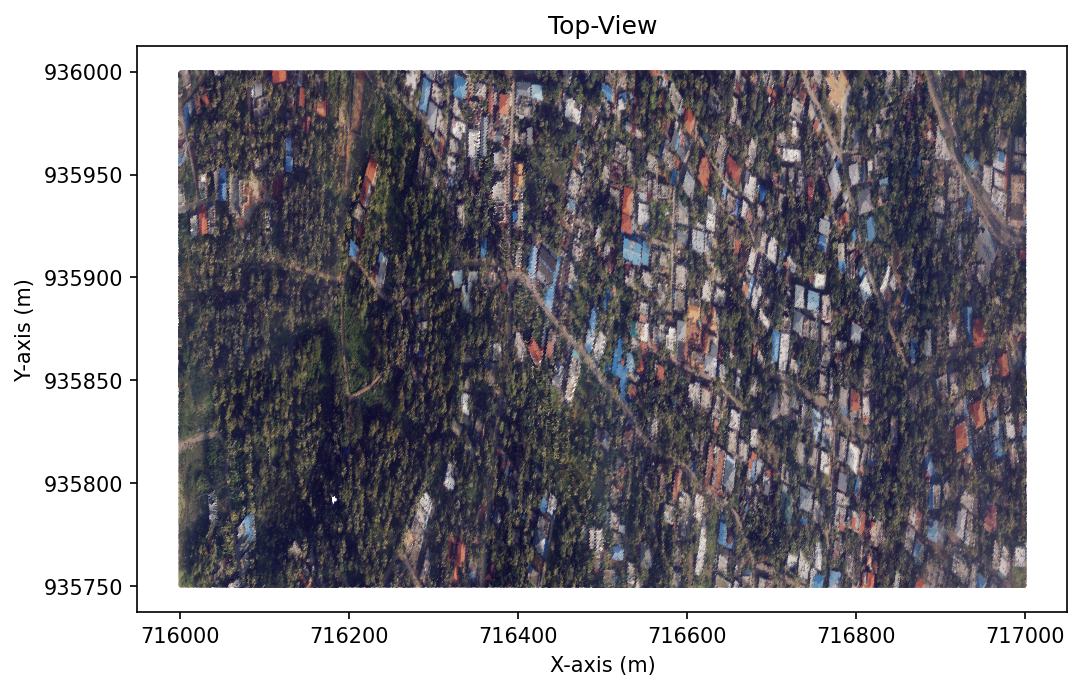

In [23]:
#Vizualising on the two axes to select the filter
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(xyz[:,0], xyz[:,1], c=rgb/255, s=0.05)
plt.title("Top-View")
plt.xlabel('X-axis (m)')
plt.ylabel('Y-axis (m)')
plt.show()

In [24]:
dataset['Classification'].unique()
colors = {3:'yellow',2:'white',5:'green',4:'green',6:'red',7:'orange',31:'orange'}

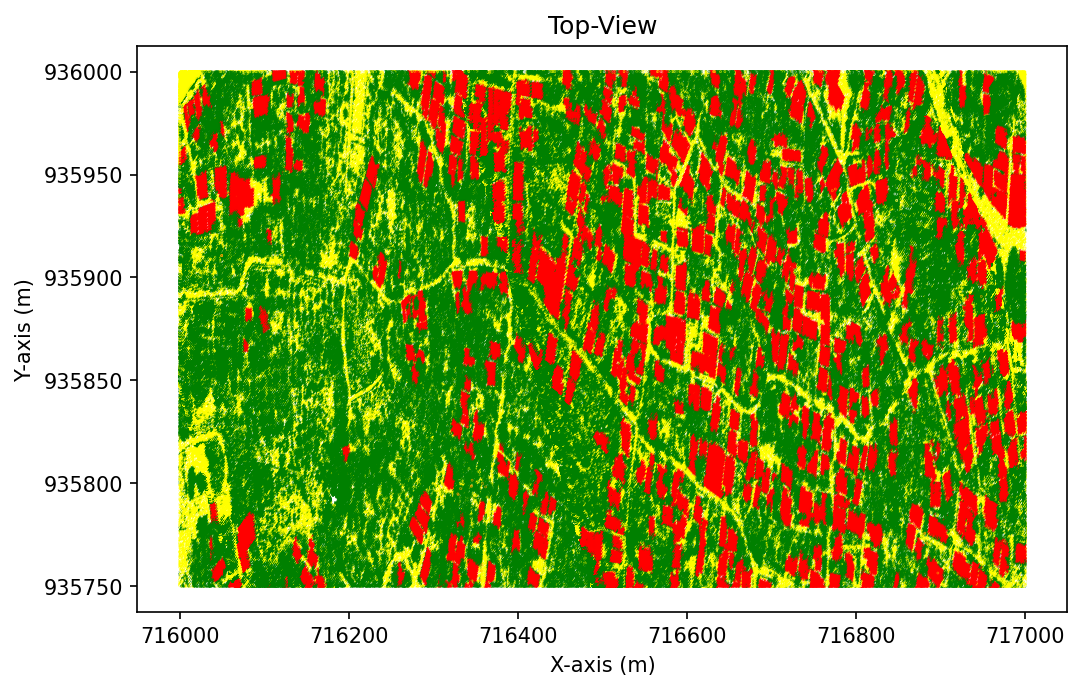

In [25]:
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(xyz[:,0], xyz[:,1], c=dataset['Classification'].map(colors), s=0.05)
plt.title("Top-View")
plt.xlabel('X-axis (m)')
plt.ylabel('Y-axis (m)')
plt.show()

In [26]:
#for interactive plotting
#import plotly.express as px
#fig = px.scatter(x=xyz[:,0], y=xyz[:,1], color=xyz[:,2])
#fig.show()

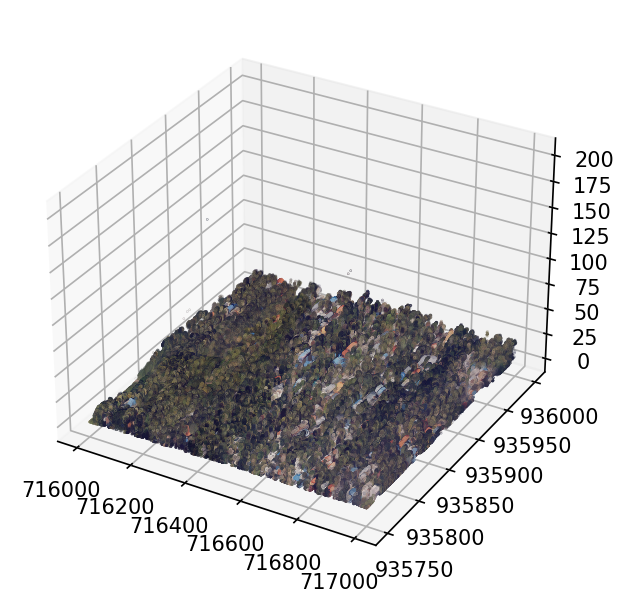

In [27]:
plt.figure(figsize=(8, 5), dpi=150)
ax = plt.axes(projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c = rgb/255, s=0.01)
plt.show()

In [28]:
from sklearn.neighbors import KDTree
tree = KDTree(np.array(xyz), leaf_size=2)
nearest_dist, nearest_ind = tree.query(xyz, k=8)
mean_distance = np.mean(nearest_dist[:,1:])

In [29]:
#!! Blank iteration
import random
inliers=[]
idx_samples = random.sample(range(len(xyz)), 3)
pts = xyz[idx_samples]

vecA = pts[1] - pts[0]
vecB = pts[2] - pts[0]
normal = np.cross(vecA, vecB)
a,b,c = normal / np.linalg.norm(normal)
d=-np.sum(normal*pts[1])

In [30]:
idx_inliers = []  # list of inliers ids
distance = (a * xyz[:,0] + b * xyz[:,1] + c * xyz[:,2] + d
            ) / np.sqrt(a ** 2 + b ** 2 + c ** 2)

threshold=0.05
idx_candidates = np.where(np.abs(distance) <= threshold)[0]
if len(idx_candidates) > len(inliers):
  equation = [a,b,c,d]
  inliers = idx_candidates

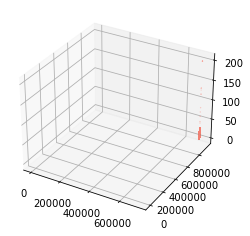

In [31]:
xyz_in=xyz[inliers]

mask = np.ones(len(xyz), dtype=bool)
mask[inliers] = False

xyz_out=xyz[mask]

ax = plt.axes(projection='3d')
ax.scatter(xyz_in[:,0], xyz_in[:,1], xyz_in[:,2], c = 'cornflowerblue', s=0.02)
ax.scatter(xyz_out[:,0], xyz_out[:,1], xyz_out[:,2], c = 'salmon', s=0.02)
plt.show()

In [32]:
def ransac_plane(xyz, threshold=0.05, iterations=1000):
    inliers=[]
    n_points=len(xyz)
    i=1

    while i < len(inliers):
        equation = [a,b,c,d]
        inliers = idx_candidates
    i+=1
    return equation, inliers

In [33]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
     

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [34]:
pcd = o3d.io.read_point_cloud(pcd)
pcd

TypeError: read_point_cloud(): incompatible function arguments. The following argument types are supported:
    1. (filename: str, format: str = 'auto', remove_nan_points: bool = False, remove_infinite_points: bool = False, print_progress: bool = False) -> open3d.cpu.pybind.geometry.PointCloud

Invoked with: array([[7.16000508e+05, 9.35999281e+05, 1.06090000e+01],
       [7.16000082e+05, 9.35999061e+05, 1.12480000e+01],
       [7.16000252e+05, 9.35998521e+05, 4.34800000e+00],
       ...,
       [7.16859130e+05, 9.35989450e+05, 2.91000000e+00],
       [7.16695340e+05, 9.35956810e+05, 2.57000000e+00],
       [7.16816470e+05, 9.35943530e+05, 2.17000000e+00]])

In [35]:
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=16), fast_normal_computation=True)
pcd.paint_uniform_color([0.6, 0.6, 0.6])

AttributeError: 'numpy.ndarray' object has no attribute 'estimate_normals'

In [ ]:
o3d.visualization.draw_geometries([pcd])

In [ ]:
import numpy as np
import pyvista as pv

# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(xyz)
cloud.plot()

volume = cloud.delaunay_3d(alpha=2.)
shell = volume.extract_geometry()
shell.plot()